Import Statments

In [66]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Activation, SimpleRNN
import datetime as dt
import matplotlib.pyplot as plt

Import Data

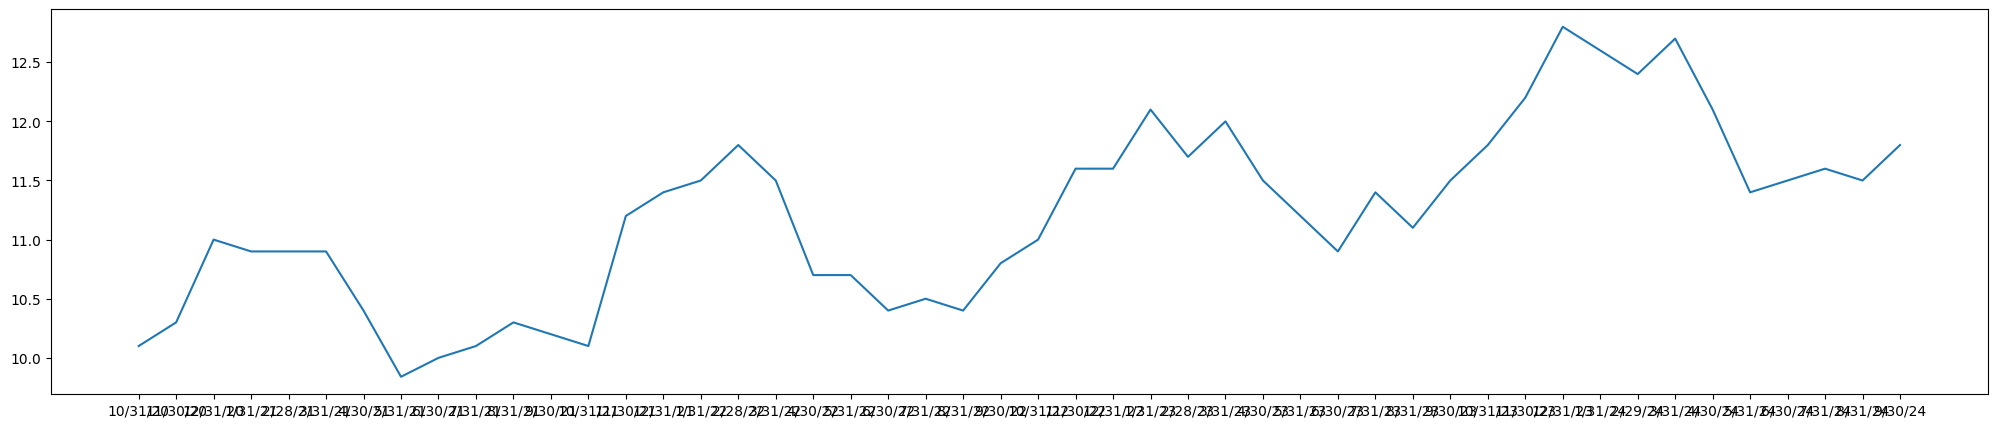

In [67]:
url = "https://raw.githubusercontent.com/arjund1999learn/DataSets/main/Nat_Gas.csv"
# Since the data points have constant intervals we can drop the month column
data = pd.read_csv(url)
# display data
fig = plt.subplots(figsize=(25, 5))
plt.plot(data['Dates'], data['Prices'])

Preprocess Data

In [68]:
# since itervals are monthly convert dates to numbers
month_values = []
year_values = []
count = 0
for x in range(len(data['Dates'])):
  month_values.append((x+9)%12 + 1)
  year_values.append((x+9)//12)
data['Month'] = month_values
data['Year'] = year_values
display(data)

,Dates,Prices,Month,Year
0,10/31/20,10.10,10,0
1,11/30/20,10.30,11,0
2,12/31/20,11.00,12,0
3,1/31/21,10.90,1,1
4,2/28/21,10.90,2,1
5,3/31/21,10.90,3,1
6,4/30/21,10.40,4,1
7,5/31/21,9.84,5,1
8,6/30/21,10.00,6,1
9,7/31/21,10.10,7,1


Create Neural Network

In [69]:
#split data into test and train data
(X_train, X_test, y_train, y_test) = train_test_split(data[['Month','Year']], data['Prices'])
# add layers to network
model = Sequential()
model.add(Dense(8, input_dim=2, activation= 'linear' ))
model.add(Dense(2,kernel_initializer='normal',activation='linear'))
model.add(Dense(1,kernel_initializer='normal',activation='linear'))
# define loss
model.compile(loss='mse',optimizer ='adam',metrics=['accuracy'])
#train model
model.fit(X_train,y_train,epochs=4000,batch_size=10,validation_split=0.05,verbose=0);
#calculate loss
scores = model.evaluate(X_train,y_train,verbose=1,batch_size=10)


8/8 [==============================] - 0s 3ms/step - loss: 0.2340 - accuracy: 0.0000e+00


2/2 [==============================] - 0s 4ms/step


Train Performance

2/2 [==============================] - 0s 8ms/step


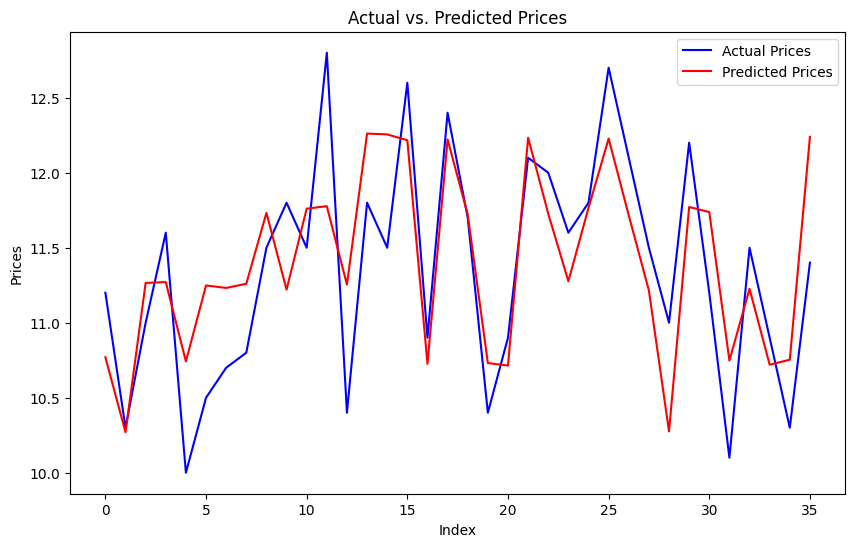

In [73]:
indices = np.arange(len(y_train))
predict=model.predict(X_train)
# Plotting the actual and predicted values on the same axis
plt.figure(figsize=(10, 6))
plt.plot(indices, y_train, color='blue', label='Actual Prices')
plt.plot(indices, predict, color='red', label='Predicted Prices')
plt.xlabel('Index')
plt.ylabel('Prices')
plt.title('Actual vs. Predicted Prices')
plt.legend()
plt.show()

Test Performance

1/1 [==============================] - 0s 22ms/step


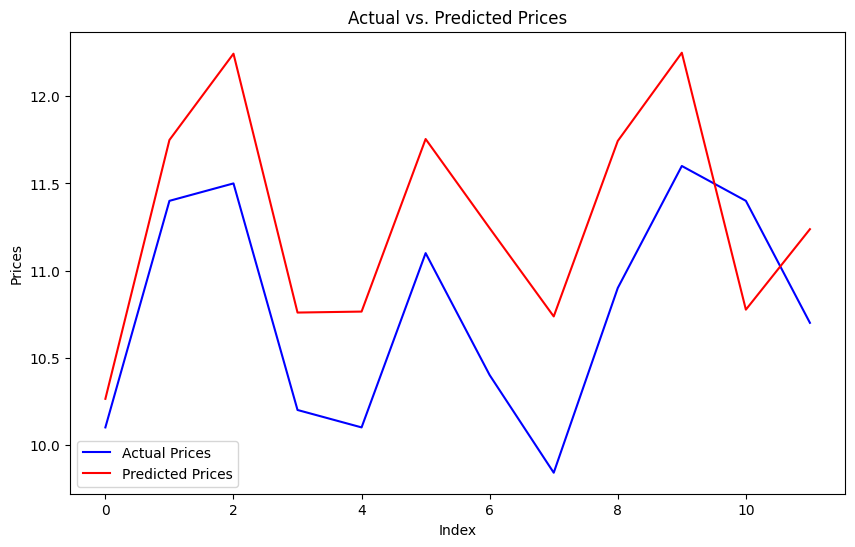

In [71]:
indices = np.arange(len(y_test))
predict=model.predict(X_test)
# Plotting the actual and predicted values on the same axis
plt.figure(figsize=(10, 6))
plt.plot(indices, y_test, color='blue', label='Actual Prices')
plt.plot(indices, predict, color='red', label='Predicted Prices')
plt.xlabel('Index')
plt.ylabel('Prices')
plt.title('Actual vs. Predicted Prices')
plt.legend()
plt.show()

Extrapolate Data 1 year

In [92]:
month_values = []
year_values = []
for x in range(48,60):
  month_values.append((x+9)%12 + 1)
  year_values.append((x+9)//12)
column_names = [ 'Month','Year']
df = {'Month': month_values, 'Year': year_values}
extrapolate = pd.DataFrame(df)
predict = model.predict(extrapolate)
extrapolate["Prediction"] = predict
display(extrapolate)

1/1 [==============================] - 0s 26ms/step


,Month,Year,Prediction
0,10,4,12.266603
1,11,4,12.272167
2,12,4,12.277732
3,1,5,12.717199
4,2,5,12.722763
5,3,5,12.728329
6,4,5,12.733892
7,5,5,12.739456
8,6,5,12.745021
9,7,5,12.750586
